## Import
Import **numpy**, **pandas** and **matplotlib**.

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

## The Dataset

The dataset was initially provided by Ms. Ethel Ong for our Advance Database (ADVANDB) class.

Both of the Marinduque and Palawan dataset was collected through an application, where the head of a household would fill-up a form. However, other parts of Palawan used a physical form (DILG-CBMS, 2016). Those who used a physical form in Palawan are not included in the dataset.

There are about **83** variables in the dataset, but we are only going to use only **5** variables in this study. The following are the descriptions of the variables that we are going to use:

- **`sex`**: Sex/Gender. <br>
&emsp; 1 - Male <br>
&emsp; 2 - Female <br>
- **`age_yr`**: Age.
- **`educal`**: Educational Attainment. <br>
&emsp; 0 - No Grade <br>
&emsp; 1 - Day Care <br>
&emsp; 2 - Nurser/Kindergarten/Preparatory <br>
&emsp; 11 - Grade 1 <br>
&emsp; 12 - Grade 2 <br>
&emsp; 13 - Grade 3 <br>
&emsp; 14 - Grade 4 <br>
&emsp; 15 - Grade 5 <br>
&emsp; 16 - Grade 6 <br>
&emsp; 17 - Grade 7 <br>
&emsp; 18 - Grade 8 <br>
&emsp; 19 - Grade 9/3rd Year HS <br>
&emsp; 20 - Grade 10/4th Year HS <br>
&emsp; 21 - Grade 11 <br>
&emsp; 22 - Grade 12 <br>
&emsp; 23 - 1st year PS PS/N-T/TV <br>
&emsp; 24 - 2nd year PS PS/N-T/TV <br>
&emsp; 25 - 3rd year PS PS/N-T/TV <br>
&emsp; 31 - 1st year College <br>
&emsp; 32 - 2nd year College <br>
&emsp; 33 - 3rd year College <br>
&emsp; 34 - 4th year College or higher <br>
&emsp; 41 - Post grad with units <br>
&emsp; 51 - ALS Elementary <br>
&emsp; 52 - ALS Secondary <br>
&emsp; 53 - SPED Elementary <br>
&emsp; 54 - SPED Secondary <br>
&emsp; 100 - Grade school graduate <br>
&emsp; 200 - High school graduate <br>
&emsp; 210 - Post secondary graduate <br>
&emsp; 300 - College graduate <br>
&emsp; 400 - Master's/PhD graduate <br>
- **`wagcshm`**: Total Salary in the last 12 months.
- **`pwd_type`**: Disability type. <br>
&emsp; 1 - Total blindness <br>
&emsp; 2 - Partial blindness <br>
&emsp; 3 - Low vision <br>
&emsp; 4 - Totally deaf <br>
&emsp; 5 - Partially deaf <br>
&emsp; 6 - Oral defect <br>
&emsp; 7 - One hand <br>
&emsp; 8 - No hands <br>
&emsp; 9 - One leg <br>
&emsp; 10 - No legs <br>
&emsp; 11 - Mild Cerebral palsy <br>
&emsp; 12 - Severe Cerebral palsy <br>
&emsp; 13 - Retarded <br>
&emsp; 14 - Mentally ill <br>
&emsp; 15 - Mentally retardation <br>
&emsp; 16 - Multiple impairment <br>
&emsp; 17 - Others <br>

### **Other Variables**

Other variables and its description can be access through this PDF/link **https://tinyurl.com/cbms-data-dictionary** pp. 27-35.

## Reading the Dataset

#### Reading the **Marinduque** dataset.

In [2]:
marinduque_mem_df = pd.read_csv("hpq_mem_marinduque.csv", dtype='unicode')

In [3]:
marinduque_df = marinduque_mem_df[["sex", "age_yr", "ynotsch", "educal", "wagcshm", "pwd_type"]].copy()

Create a new column called **province** and set it as **Marinduque**. We added this column to distinguish the dataset between the two provinces.

In [4]:
marinduque_df["province"] = "Marinduque"
marinduque_df

,sex,age_yr,ynotsch,educal,wagcshm,pwd_type,province
0,1,53,NaN,16,6000,NaN,Marinduque
1,2,52,NaN,16,1000,NaN,Marinduque
2,2,23,11,32,48000,NaN,Marinduque
3,1,14,NaN,17,0,NaN,Marinduque
4,1,12,NaN,15,0,NaN,Marinduque
...,...,...,...,...,...,...,...
204776,1,20,NaN,32,0,NaN,Marinduque
204777,1,18,NaN,20,0,NaN,Marinduque
204778,1,15,NaN,19,0,NaN,Marinduque
204779,1,13,NaN,17,0,NaN,Marinduque


There are **204,781** observations in the **Marinduque** member record dataset.

#### Reading the **Palawan** dataset

In [5]:
palawan_mem_df = pd.read_csv("hpq_mem_palawan.csv", dtype='unicode')

In [6]:
palawan_df = palawan_mem_df[["sex", "age_yr", "ynotsch", "educal", "wagcshm", "pwd_type"]].copy()

Again, create a new column called **province** and set it as **Palawan**.

In [7]:
palawan_df["province"] = "Palawan"
palawan_df

,sex,age_yr,ynotsch,educal,wagcshm,pwd_type,province
0,1,57,15,14,0,NaN,Palawan
1,2,46,15,16,0,NaN,Palawan
2,2,21,NaN,19,0,NaN,Palawan
3,1,16,1,16,0,NaN,Palawan
4,1,11,NaN,15,0,NaN,Palawan
...,...,...,...,...,...,...,...
459097,1,29,8,200,0,NaN,Palawan
459098,2,26,4,200,0,NaN,Palawan
459099,2,17,NaN,19,0,NaN,Palawan
459100,2,21,6,210,0,NaN,Palawan


There are **459,102** observations in the **Palawan** member record dataset.

## Merging the Two Dataset

In [8]:
all_df = palawan_df.append(marinduque_df, ignore_index=True)
all_df

,sex,age_yr,ynotsch,educal,wagcshm,pwd_type,province
0,1,57,15,14,0,NaN,Palawan
1,2,46,15,16,0,NaN,Palawan
2,2,21,NaN,19,0,NaN,Palawan
3,1,16,1,16,0,NaN,Palawan
4,1,11,NaN,15,0,NaN,Palawan
...,...,...,...,...,...,...,...
663878,1,20,NaN,32,0,NaN,Marinduque
663879,1,18,NaN,20,0,NaN,Marinduque
663880,1,15,NaN,19,0,NaN,Marinduque
663881,1,13,NaN,17,0,NaN,Marinduque


## Cleaning the Dataset

### `sex` variable

We check if the values for the variable **sex** is either **1** or **2**.

In [9]:
all_df["sex"].unique()

array(['1', '2', '7/23/2003'], dtype=object)

We now map **1** to **Male** and **2** to **Female**.

In [10]:
all_df['sex'] = all_df['sex'].map({'1': 'Male', '2': 'Female'})

We check again if the mapping was executed successfully.

In [11]:
all_df["sex"].unique()

array(['Male', 'Female', nan], dtype=object)

We now drop the observations with null values in the sex variable.

In [12]:
all_df = all_df.dropna(subset=['sex'])

We check if null values were successfully dropped.

In [13]:
all_df["sex"].unique()

array(['Male', 'Female'], dtype=object)

A simple summary of males and females in both provinces.

Text(0.5, 1.0, '')

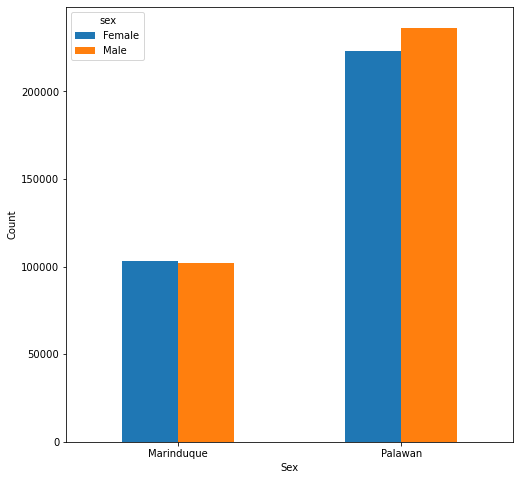

In [14]:
all_df.groupby(["province", "sex"]).size().unstack().plot(kind="bar", figsize=(8, 8))
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.title('')

It shows that there are more people in Palawan than in Marinduque, since Palawan is bigger than Marinduque in terms of land. On the other hand, the sex ratio in Marinduque is almost 1:1. In Palawan, there more males than females and is also close to ratio of 1:1.

### `age_yr` variable

We check if there are any **null** values in the variable **age**.

In [15]:
all_df["age_yr"].isnull().any()

False

There are'nt any null values in the variable **age**. Now, we check what is/are data type/s of the variable **age**.

In [16]:
all_df['age_yr'].apply(type).value_counts()

<class 'str'>    663882
Name: age_yr, dtype: int64

Based on the result, the variable **age** is in **string** format. We now change the data type of variable **age** from **string** to **integer**.

In [17]:
all_df['age_yr'] = all_df['age_yr'].astype(int)

<ipython-input-17-7bb2fee67357>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_df['age_yr'] = all_df['age_yr'].astype(int)


We will now use **box plot** to see if there are any **outliers** in the variable **age**.

Text(0.5, 1.0, 'Age boxplot')

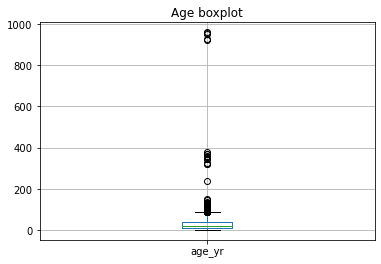

In [18]:
all_df.boxplot(column="age_yr")
plt.title("Age boxplot")

We can see in the box plot that there are several **outliers** in the variable **age**. We now see what are these values.

In [19]:
all_df.sort_values('age_yr')['age_yr'].tail(25)

379071    125
330357    126
350052    129
243909    130
190761    136
511586    146
388241    148
378995    238
322254    319
117623    321
383780    325
361957    346
233445    346
466060    354
380757    355
382341    355
182077    361
469267    369
416659    369
226332    381
172461    925
414833    927
377107    953
256153    957
479404    961
Name: age_yr, dtype: int32

We now **drop** these observations whose **age** are **greater than 120**.

In [20]:
all_df = all_df.drop(all_df[all_df['age_yr'] > 120].index)

Let us see now what is the **max** value of **age** in the dataset.

In [21]:
all_df['age_yr'].max()

119

**119** is now the max age in our dataset. We now run the **box plot** again.

Text(0.5, 1.0, 'Age boxplot')

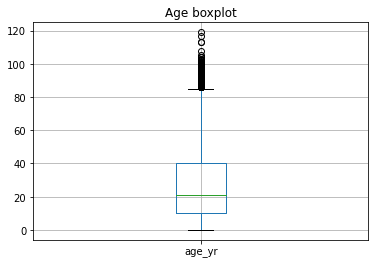

In [22]:
all_df.boxplot(column="age_yr")
plt.title("Age boxplot")

Based on the box plot, we can see that the **extreme outliers** are now **gone**. In the box plot, we can also see that the **median** is around **21** years old.

We now apply binning in the variable **age** and create a column called **age_group**.

In [23]:
bins= [0,10,20,30,40,50,60,120]
labels = ['0-9','10-19','20-29','30-39','40-49','50-59','60+']
all_df['age_group'] = pd.cut(all_df['age_yr'], bins=bins, labels=labels, right=False)
all_df

,sex,age_yr,ynotsch,educal,wagcshm,pwd_type,province,age_group
0,Male,57,15,14,0,NaN,Palawan,50-59
1,Female,46,15,16,0,NaN,Palawan,40-49
2,Female,21,NaN,19,0,NaN,Palawan,20-29
3,Male,16,1,16,0,NaN,Palawan,10-19
4,Male,11,NaN,15,0,NaN,Palawan,10-19
...,...,...,...,...,...,...,...,...
663878,Male,20,NaN,32,0,NaN,Marinduque,20-29
663879,Male,18,NaN,20,0,NaN,Marinduque,10-19
663880,Male,15,NaN,19,0,NaN,Marinduque,10-19
663881,Male,13,NaN,17,0,NaN,Marinduque,10-19


Text(0.5, 1.0, '')

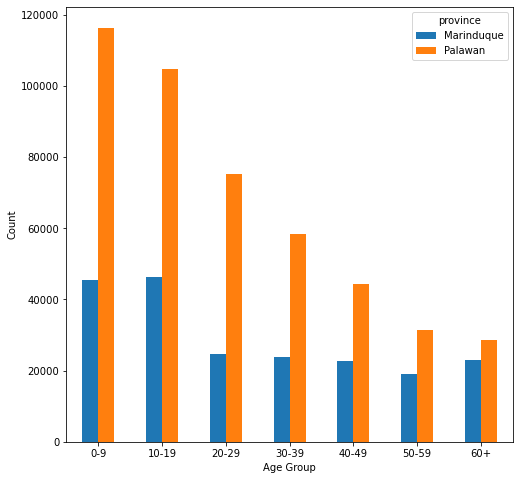

In [59]:
all_df.groupby(["age_group", "province"]).size().unstack().plot(kind="bar", figsize=(8, 8))
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.title('')

### `educal` variable

In [24]:
all_df["educal"].unique()

array(['14', '16', '19', '15', '2', '13', '33', '20', '0', '32', '11',
       '18', nan, '1', '17', '12', '300', '31', '24', '200', '34', '52',
       '100', '41', '210', '23', '51', '25', '400', '53', '21', '22',
       '54'], dtype=object)

In [25]:
all_df["educal"].isnull().any()

True

In [26]:
all_df.loc[all_df['educal'].isnull(),'educal'] = -1

In [27]:
all_df['educal'] = all_df['educal'].astype(int)

In [28]:
all_df["educal"].unique()

array([ 14,  16,  19,  15,   2,  13,  33,  20,   0,  32,  11,  18,  -1,
         1,  17,  12, 300,  31,  24, 200,  34,  52, 100,  41, 210,  23,
        51,  25, 400,  53,  21,  22,  54])

We now apply binning/grouping in the variable **educal** or educational attainment and create a column called **educal_range**.

- **`No Grade`**: No Grade.
- **`Day Care`**: Day Care.
- **`Pre-School`**: Pre-School.
- **`Elementary`**: Grade 1 to Grade 6.
- **`Elementary Graduate`**: Elementary Graduate.
- **`High School`**: Grade 7 to Grade 12.
- **`High School Graduate`**: High School Graduate.
- **`Post-Secondary`**: 1st yr to 3rd yr Post-Secondary.
- **`Post-Secondary Graduate`**: Post-Secondary Graduate.
- **`College Undergraduate`**: College 1st yr to 4th yr or higher.
- **`College Graduate`**: College Graduate.
- **`Post-Grad`**: Masters/Doctorate Degree.
- **`SPED`**: Special Education and ALS.

In [29]:
all_df["educal_range"] = all_df["educal"].map({0: 'No Grade', 
                                               1: 'Day Care',
                                               2: 'Pre-School',
                                               11: 'Elementary', 12: 'Elementary', 13: 'Elementary', 14: 'Elementary', 15: 'Elementary', 16: 'Elementary', 100: 'Elementary Graduate',
                                               17: 'High School', 18: 'High School', 19: 'High School', 20: 'High School', 21: 'High School', 22: 'High School', 200: 'High School Graduate',
                                               23: 'Post-Secondary', 24: 'Post-Secondary', 25: 'Post-Secondary', 210: 'Post-Secondary Graduate',
                                               31: 'College Undergraduate', 32: 'College Undergraduate', 33: 'College Undergraduate', 34: 'College Undergraduate',
                                               41: 'Post-Grad', 400: "Post-Grad",
                                               51: 'SPED', 52: 'SPED', 53: 'SPED', 54: 'SPED',
                                               300: 'College Graduate',
                                               -1: "Not Stated"})

In [30]:
all_df.groupby(["educal_range", "sex"]).size()

educal_range             sex   
College Graduate         Female     19739
                         Male       13255
College Undergraduate    Female     22352
                         Male       18899
Day Care                 Female      8602
                         Male        8891
Elementary               Female     99224
                         Male      117982
Elementary Graduate      Female     21428
                         Male       23587
High School              Female     53828
                         Male       54786
High School Graduate     Female     35859
                         Male       32465
No Grade                 Female     27927
                         Male       28577
Not Stated               Female     21808
                         Male       22396
Post-Grad                Female       838
                         Male         998
Post-Secondary           Female      2333
                         Male        3030
Post-Secondary Graduate  Female      2335
  

Text(0.5, 1.0, '')

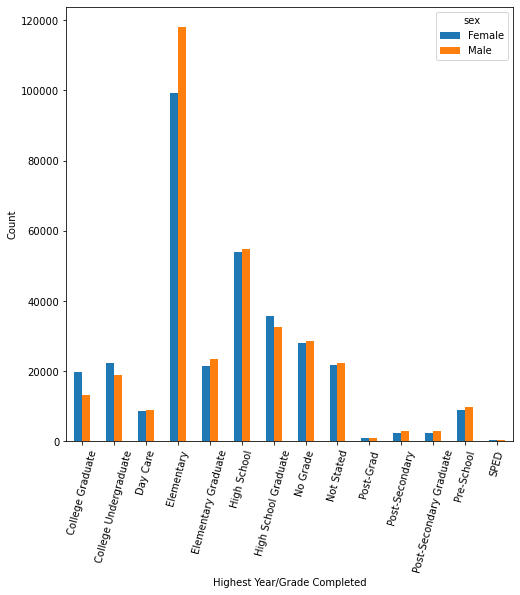

In [31]:
all_df.groupby(["educal_range", "sex"]).size().unstack().plot(kind="bar", figsize=(8, 8))
plt.xlabel('Highest Year/Grade Completed')
plt.ylabel('Count')
plt.xticks(rotation=75)
plt.title('')

In the provinces of Marinduque and Palawan, more people attended elementary education. On the other hand, we can see that there are more females than males who are college graduates and undergraduates. There are also more females who attended or completed high school than males.

### `wagcshm` variable

In [32]:
all_df["wagcshm"].isnull().any()

True

In [33]:
all_df["wagcshm"].isna().sum()

1

In [34]:
all_df['wagcshm'].apply(type).value_counts()

<class 'str'>      663855
<class 'float'>         1
Name: wagcshm, dtype: int64

In [35]:
all_df['wagcshm'] = all_df['wagcshm'].astype(float)
all_df['wagcshm'].apply(type).value_counts()

<class 'float'>    663856
Name: wagcshm, dtype: int64

In [36]:
all_df['wagcshm'].value_counts()

0.0          535442
36000.0        7417
24000.0        4926
10000.0        4855
30000.0        4639
              ...  
120800.0          1
292654.0          1
73140.0           1
4680000.0         1
65285.0           1
Name: wagcshm, Length: 4584, dtype: int64

In [37]:
len(all_df.query('wagcshm == 0')) / len(all_df) * 100

80.65634715962497

Text(0.5, 1.0, 'Income boxplot')

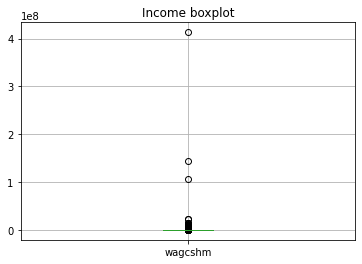

In [38]:
all_df.boxplot(column="wagcshm")
plt.title("Income boxplot")

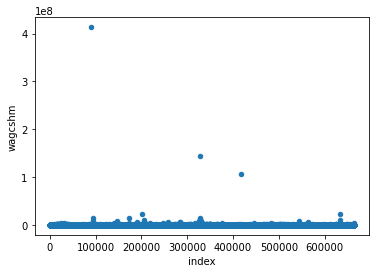

In [39]:
all_df.reset_index().plot.scatter(x = 'index', y = 'wagcshm')

In [40]:
#all_df.sort_values('wagcshm')[['wagcshm', 'province', 'occup', 'indust', 'educal']].tail(25)

In [41]:
all_df = all_df.drop(all_df[all_df['wagcshm'] > 100000000].index)

In [42]:
all_df['wagcshm'].max()

23053296.0

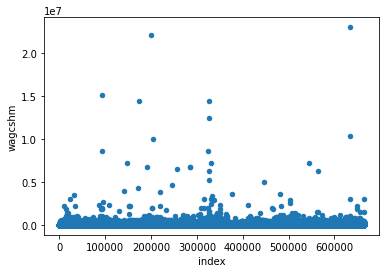

In [43]:
all_df.reset_index().plot.scatter(x = 'index', y = 'wagcshm')

Text(0.5, 1.0, 'Annual Salary boxplot')

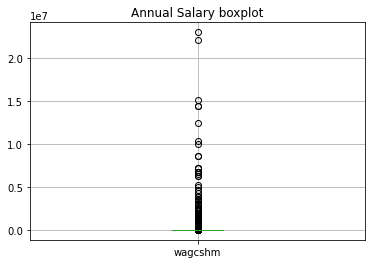

In [44]:
all_df.boxplot(column="wagcshm")
plt.title("Annual Salary boxplot")

Text(0.5, 1.0, '')

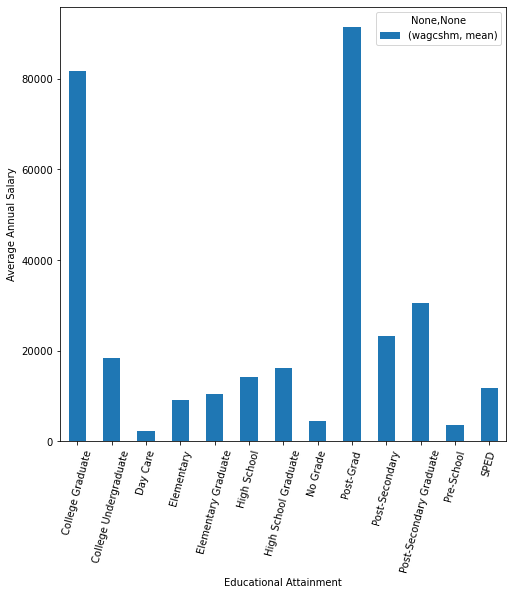

In [45]:
all_df[all_df["age_yr"] >= 18].groupby("educal_range").agg({"wagcshm": ["mean"]}).plot(kind="bar", figsize=(8, 8))
plt.xlabel('Educational Attainment')
plt.ylabel('Average Annual Salary')
plt.xticks(rotation=75)
plt.title('')

### `pwd_type` variable

In [46]:
all_df["pwd_type"].isnull().any()

True

In [47]:
all_df["pwd_type"].unique()

array([nan, '4', '7', '14', '17', '16', '15', '13', '2', '12', '11', '9',
       '1', '5', '6', '3', '10', '8'], dtype=object)

In [48]:
all_df.loc[all_df['pwd_type'].isnull(),'pwd_type'] = -1

In [49]:
all_df["pwd_type"].apply(type).value_counts()

<class 'int'>    656929
<class 'str'>      6924
Name: pwd_type, dtype: int64

In [50]:
all_df['pwd_type'] = all_df['pwd_type'].astype(int)

In [51]:
all_df["pwd_type"].apply(type).value_counts()

<class 'int'>    663853
Name: pwd_type, dtype: int64

all_df["pwd_type_full"] = all_df["pwd_type"].map({1: 'Total blindness', 2: 'Partial blindness',
                                                  3: 'Low vision', 4: 'Totally deaf',
                                                  5: 'Partially deaf', 6: 'Oral defect',
                                                  7: 'One hand', 8: 'No hands',
                                                  9: 'One leg', 10: 'No legs',
                                                  11: 'Mild Cerebral palsy', 12: 'Severe Cerebral palsy',
                                                  13: 'Retarded', 14: 'Mentally ill',
                                                  15: 'Mentally retardation', 16: 'Multiple impairment',
                                                  17: 'Others'})

In [52]:
all_df["pwd_type_full"] = all_df["pwd_type"].map({1: 'Blindness', 2: 'Blindness',
                                                  3: 'Blindness', 4: 'Deaf',
                                                  5: 'Deaf', 6: 'Oral defect',
                                                  7: 'Missing Limb/s', 8: 'Missing Limb/s',
                                                  9: 'Missing Limb/s', 10: 'Missing Limb/s',
                                                  11: 'Mentally Disabled', 12: 'Mentally Disabled',
                                                  13: 'Mentally Disabled', 14: 'Mentally ill',
                                                  15: 'Mentally Disabled', 16: 'Multiple impairment',
                                                  17: 'Others'})

Text(0.5, 1.0, '')

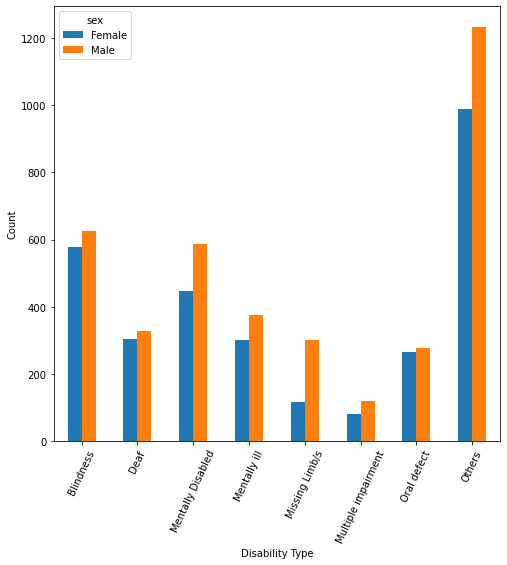

In [53]:
all_df.groupby(["pwd_type_full", "sex"]).size().unstack().plot(kind="bar", figsize=(8, 8))
plt.xlabel('Disability Type')
plt.ylabel('Count')
plt.xticks(rotation=65)
plt.title('')

Text(0.5, 1.0, '')

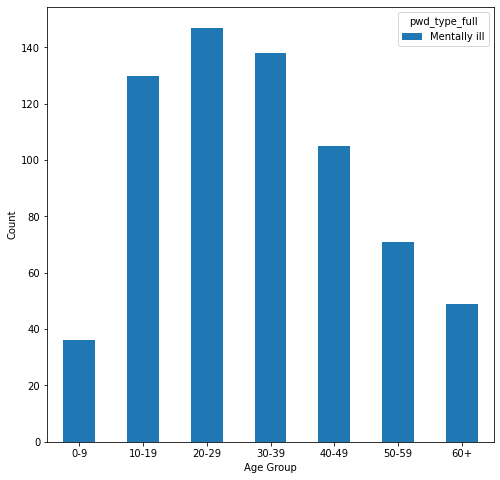

In [60]:
all_df[all_df["pwd_type_full"] == 'Mentally ill'].groupby(["age_group", "pwd_type_full"]).size().unstack().plot(kind="bar", figsize=(8, 8))
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.title('')

In [55]:
sample_df = all_df.query("educal_range == 'College Graduate' | educal_range == 'College Undergraduate'").sample(60)
sample_df.shape

(60, 10)

In [56]:
ttest_ind(sample_df[sample_df["educal_range"] == "College Graduate"]["wagcshm"],
          sample_df[sample_df["educal_range"] == "College Undergraduate"]["wagcshm"],
          equal_var = False)

Ttest_indResult(statistic=1.4298477812917227, pvalue=0.15977545217463504)

In [57]:
all_df["regvotind"].value_counts()

KeyError: 'regvotind'

In [ ]:
all_df[all_df['age_yr']>= 12]["regvotind"].value_counts()

In [ ]:
all_df["ynotsch_full"] = all_df["ynotsch"].map({1: 'Schools are very far', 2: 'No school within the brgy', 3: 'No regular transportation', 4: 'High cost of education', 5: 'Illness/Disability', 6: 'Housekeeping/taking care of siblings', 7: 'Marriage', 8: 'Employment/looking for work', 9: 'Lack of personal interest', 10: 'Cannot cope with school work', 11: 'Finished schooling', 12: 'Problem with school record', 13: 'Problem with birth certificate', 14: 'Too young to go to school', 15: 'Others'})

In [ ]:
adults_df.groupby("educal_range").agg({"wagcshm": ["mean"]}).sort_values(("educal_range")).plot(kind="bar", figsize=(8, 8))
plt.xlabel('Average salary for 12 months')
plt.ylabel('Educational Attainment')
plt.xticks(rotation=65)
plt.title('')

In [ ]:
adults_df.groupby("sex").agg({"wagcshm": ["mean"]}).plot(kind="bar", figsize=(8, 8))
plt.ylabel('Average salary for 12 months')
plt.xlabel('Educational Attainment')
plt.xticks(rotation=65)
plt.title('')

In [ ]:
all_df.groupby(['educal', 'sex']).size().unstack().sort_values(("educal")).plot(kind='bar', figsize=(8, 8))
plt.xlabel('Educational Attainment')
plt.ylabel('Count')
plt.xticks(rotation=65)
plt.title('')

In [ ]:
young_people_df = all_df.query("age_yr <= 24")

In [ ]:
young_people_df["age_yr"]

In [ ]:
young_people_df["ynotsch"]

In [ ]:
#young_people_df = young_people_df.dropna(subset=['ynotsch'])

In [ ]:
young_people_df["ynotsch"].unique()

In [ ]:
#young_people_df['ynotsch'] = young_people_df['ynotsch'].astype(int)
young_people_df.groupby(["ynotsch", "sex"]).size()

In [ ]:
young_people_df[young_people_df['ynotsch_full'] != -1].groupby(['ynotsch_full', 'sex']).size().unstack().plot(kind='barh', figsize=(8, 8))
plt.xlabel('Count')
plt.ylabel('Reason for Not Going to School')
plt.title('')

In [ ]:
all_df['occup'].unique()

In [ ]:
all_df.shape

In [ ]:
all_df.reset_index().plot.scatter(x = 'index', y = 'wagcshm')
plt.axis([0,663883,0,23053296])

In [ ]:
all_df.sort_values('wagcshm')[['wagcshm', 'province', 'occup', 'indust', 'educal_full']].tail(50)

In [ ]:
all_df['age_yr'].value_counts()

In [ ]:
all_df.reset_index().plot.scatter(x = 'index', y = 'age_yr')

In [ ]:
all_df.sort_values('age_yr')['age_yr'].tail(50)

In [ ]:
all_df['age_2022'] = all_df['age_yr'] + 6 + 2

In [ ]:
all_df[all_df['age_2022'] >= 18].groupby('province').size()

Suppose that Commission on Elections wants to know how many new voters to expect in the 2022 Philippine elections.

We filter out the data whose age are greater than 16, because an elections happened in 2016 and the data was collected on 2014.

In [ ]:
new_voters = all_df[all_df['age_yr'] < 16]

In [ ]:
new_voters['age_yr']

In [ ]:
new_voters['age_2022'] = new_voters['age_yr'] + 6 + 2

In [ ]:
new_voters['age_2022']

In [ ]:
new_voters = new_voters[new_voters['age_2022'] >= 18]

In [ ]:
new_voters

In [ ]:
new_voters.groupby('province').size()

In [ ]:
all_df.groupby('mcrimeind').size()

In [ ]:
all_df.groupby(['mcrimeind', 'mtheftind', 'mrapeind', 'minjurind', 'mcarnapind', 'mcattrustlind', 'mocrimind']).size()

In [ ]:
all_df.groupby("educal_full").agg({"wagcshm": ["mean", "median", "std", len]})

In [ ]:
all_df.query("educal == 300 | educal == 200").groupby("educal_full").agg({"wagcshm": ["mean", "median", "std", len]})

In [ ]:
sample_df = all_df.query("educal == 300 | educal == 200").sample(60)
sample_df.shape

In [ ]:
ttest_ind(sample_df[sample_df["educal"] == 300]["wagcshm"],
          sample_df[sample_df["educal"] == 200]["wagcshm"],
          equal_var = False)

In [ ]:
sample_df.groupby("educal_full").agg({"wagcshm": ["mean", "median", "std", len]})

In [ ]:
sample_df.boxplot(column="wagcshm")

In [ ]:
all_df.query("educal == 200 | educal == 100").shape

In [ ]:
sample_df = all_df.query("educal == 200 | educal == 100").sample(60)
sample_df.shape

In [ ]:
ttest_ind(sample_df[sample_df["educal"] == 200]["wagcshm"],
          sample_df[sample_df["educal"] == 100]["wagcshm"],
          equal_var = False)

In [ ]:
sample_df.groupby("educal_full").agg({"wagcshm": ["mean", "median", "std", len]})

In [ ]:
sample_df.boxplot(column="wagcshm")

In [ ]:
all_df = adults_df.sample(60)
all_df["province"].value_counts()

In [ ]:
print(np.var(all_df[all_df["sex"] == "male"]["wagcshm"]), np.var(all_df[all_df["sex"] == "female"]["wagcshm"]))

In [ ]:
ttest_ind(all_df[all_df["province"] == "Marinduque"]["wagcshm"],
          all_df[all_df["province"] == "Palawan"]["wagcshm"],
          equal_var = False)

In [ ]:
all_df.groupby("province").agg({"wagcshm": ["mean", "median", "std", len]})

In [ ]:
all_df.groupby(['pwd_type', 'sex']).size().unstack().plot(kind='bar', figsize=(8, 8))
plt.xlabel('Educational Attainment')
plt.ylabel('Count')
plt.xticks(rotation=65)
plt.title('')